### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# Local imports
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()



### 30 cm


In [2]:
# Define study
STUDY_NAME = "PU_function_all_optics"
COLLIDER = "collider_00"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)


df

normalized amplitude in xy-plane  \
beam  name base collider num_particles_per_bunch crossing_angle                                     
lhcb1 collider_00        6.000000e+10            100.0                                        4.5   
                                                 102.5                                        4.5   
                                                 105.0                                        4.5   
                                                 107.5                                        4.5   
                                                 110.0                                        4.5   
...                                                                                           ...   
                         1.400000e+11            137.5                                        4.5   
                                                 140.0                                        4.5   
                                                 142.5                                        4.5   
                                                 145.0                                        4.5   
                                                 147.5                                        4.5   

                                                                     qx  \
beam  name base collider num_particles_per_bunch crossing_angle           
lhcb1 collider_00        6.000000e+10            100.0           62.313   
                                                 102.5           62.313   
                                                 105.0           62.313   
                                                 107.5           62.313   
                                                 110.0           62.313   
...                                                                 ...   
                         1.400000e+11            137.5           62.313   
                                                 140.0           62.313   
                                                 142.5           62.313   
                                                 145.0           62.313   
                                                 147.5           62.313   

                                                                     qy   dqx  \
beam  name base collider num_particles_per_bunch crossing_angle                 
lhcb1 collider_00        6.000000e+10            100.0           60.318  15.0   
                                                 102.5           60.318  15.0   
                                                 105.0           60.318  15.0   
                                                 107.5           60.318  15.0   
                                                 110.0           60.318  15.0   
...                                                                 ...   ...   
                         1.400000e+11            137.5           60.318  15.0   
                                                 140.0           60.318  15.0   
                                                 142.5           60.318  15.0   
                                                 145.0           60.318  15.0   
                                                 147.5           60.318  15.0   

                                                                  dqy  \
beam  name base collider num_particles_per_bunch crossing_angle         
lhcb1 collider_00        6.000000e+10            100.0           15.0   
                                                 102.5           15.0   
                                                 105.0           15.0   
                                                 107.5           15.0   
                                                 110.0           15.0   
...                                                               ...   
                         1.400000e+11            137.5           15.0   
                                                 140.0          

In [3]:
# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

# Reshape for plotting
df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot

crossing_angle,100.0,102.5,105.0,107.5,110.0,112.5,115.0,117.5,120.0,122.5,125.0,127.5,130.0,132.5,135.0,137.5,140.0,142.5,145.0,147.5
num_particles_per_bunch,,,,,,,,,,,,,,,,,,,,
6.000000e+10,4.5,4.5,4.5,4.500,4.500,4.750,4.719,4.625,NaN,5.062,5.062,NaN,5.469,NaN,5.688,5.562,NaN,NaN,NaN,NaN
6.250000e+10,4.5,4.5,4.5,4.531,4.500,4.594,4.625,4.906,4.938,4.969,5.094,5.250,5.344,5.531,5.562,NaN,NaN,NaN,NaN,NaN
6.500000e+10,4.5,4.5,4.5,4.500,4.500,4.531,4.562,4.562,4.875,5.031,5.031,5.219,5.281,5.438,5.594,5.594,NaN,NaN,NaN,NaN
6.750000e+10,4.5,4.5,4.5,4.500,4.500,4.500,4.500,4.625,4.812,4.969,5.062,5.125,NaN,5.500,NaN,5.438,NaN,NaN,NaN,NaN
7.000000e+10,4.5,4.5,4.5,4.500,4.531,4.594,4.500,4.531,4.594,4.875,4.906,4.969,5.125,5.375,NaN,NaN,NaN,NaN,NaN,NaN
7.250000e+10,4.5,4.5,4.5,4.500,4.500,4.531,4.500,4.656,4.656,4.938,4.969,4.906,5.094,NaN,5.406,5.531,NaN,NaN,NaN,NaN
7.500000e+10,4.5,4.5,4.5,4.500,4.500,4.500,4.531,4.500,4.750,4.781,4.781,4.875,5.188,5.250,5.438,5.281,5.406,NaN,NaN,NaN
7.750000e+10,4.5,4.5,4.5,4.500,4.500,4.531,4.500,4.500,4.656,4.719,4.844,4.875,NaN,5.125,5.031,5.375,5.562,NaN,NaN,NaN
8.000000e+10,4.5,4.5,4.5,4.500,4.500,4.500,4.500,4.500,4.656,4.688,4.719,4.750,NaN,5.125,5.281,NaN,5.312,NaN,NaN,NaN


In [4]:
df_to_plot.index /= 1e11

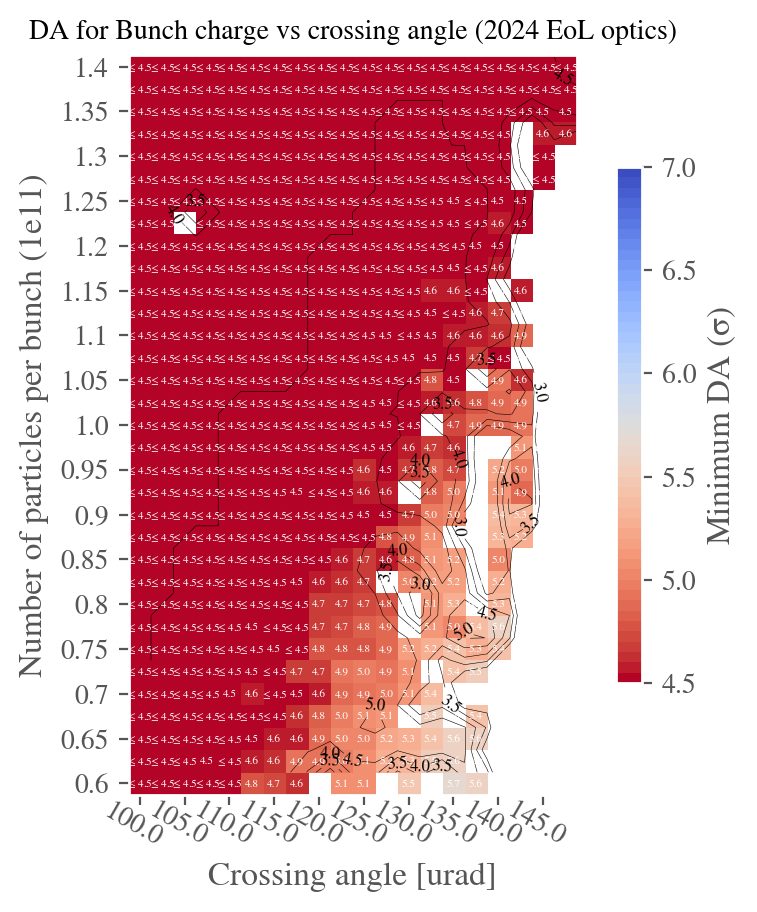

In [5]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL optics)"
)
